# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Problem Statement

In [4]:
df= pd.DataFrame(load_diabetes().data)

In [6]:
df.columns = load_diabetes().feature_names

In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [8]:
load_diabetes().target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [19]:
df.shape

(442, 10)

In [20]:
df["Diabetes"]=load_diabetes().target

In [21]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [22]:
df.nunique()

age          58
sex           2
bmi         163
bp          100
s1          141
s2          302
s3           63
s4           66
s5          184
s6           56
Diabetes    214
dtype: int64

In [23]:
df.isnull().sum()

age         0
sex         0
bmi         0
bp          0
s1          0
s2          0
s3          0
s4          0
s5          0
s6          0
Diabetes    0
dtype: int64

In [24]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabetes
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


<AxesSubplot:>

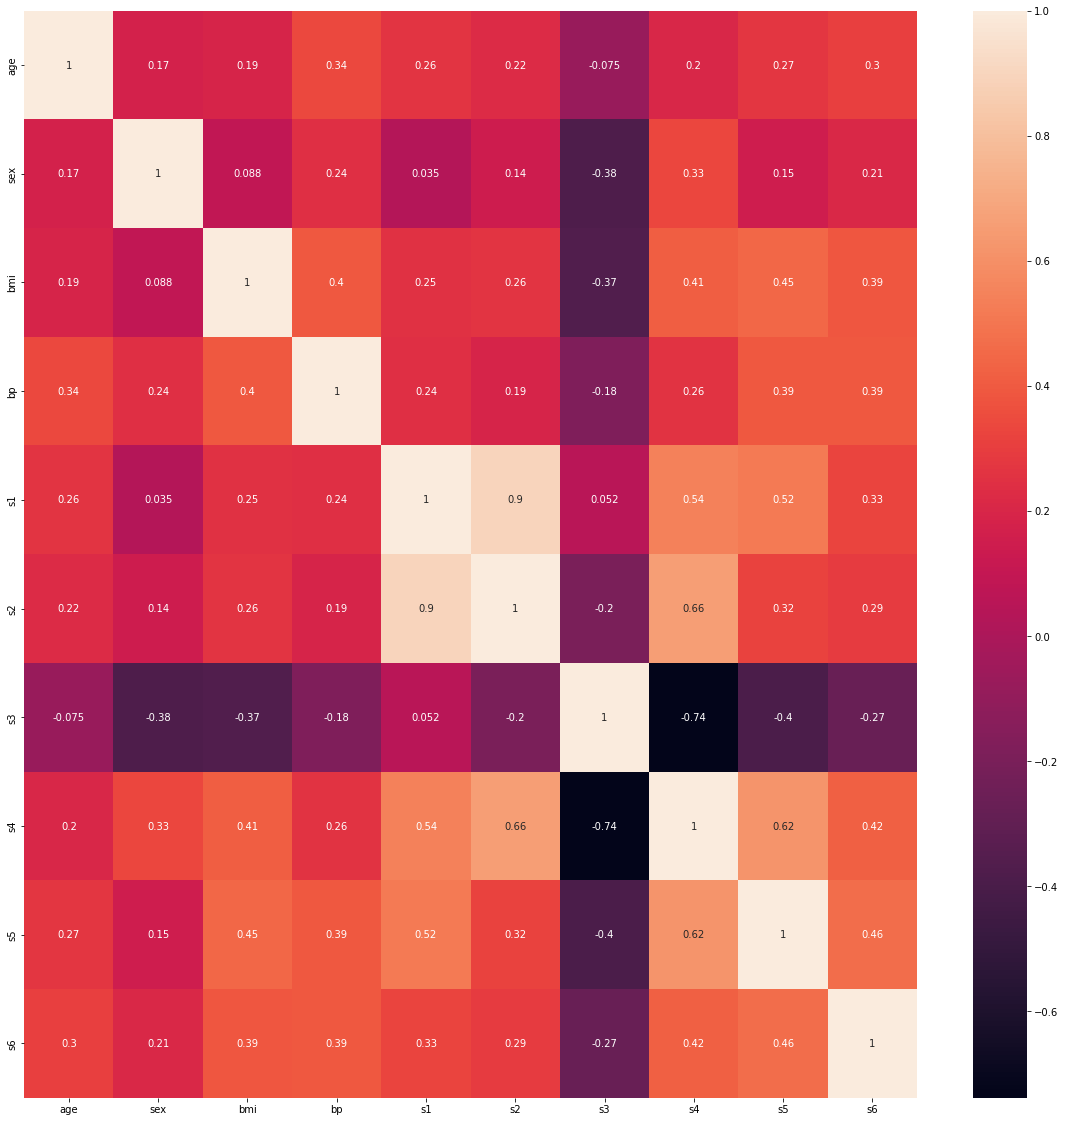

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)  #<- This annot will show the data values

# Machine Learning - Linear Regression

In [17]:
x=np.array(df.drop(["Diabetes"],axis=1))

In [18]:
x

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [19]:
y=np.array(load_diabetes().target)

In [20]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

# Splitting the data

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [27]:
len(x_train)

353

In [28]:
len(x_test)

89

In [29]:
len(y_train)

353

In [30]:
len(y_test)

89

# Choosing the model

In [11]:
model = LinearRegression()

# Fitting/ Train the model

In [32]:
model.fit(x_train,y_train)

LinearRegression()

In [33]:
model.intercept_

151.43006895898006

In [34]:
model.coef_

array([ -30.62168241, -272.25451707,  528.84444333,  327.70269026,
       -581.01413007,  332.96286278,  -27.97606192,  139.28448979,
        665.07521004,   61.90596378])

# Prediction or testing the model performance

In [35]:
y_test

array([ 78., 152., 200.,  59., 311., 178., 332., 132., 156., 135., 220.,
       233.,  91.,  51., 195., 109., 217.,  94.,  89., 111., 129., 181.,
       168.,  97., 115., 202.,  84., 147., 253., 144., 262., 115.,  68.,
        65., 252., 212., 142., 215., 180., 163., 151., 283.,  66.,  83.,
       214., 189., 302.,  93., 178., 241.,  52., 144., 102., 200., 232.,
        97., 109.,  55.,  63.,  98.,  88., 233., 235.,  97., 243.,  59.,
       138., 220., 137.,  72., 109.,  71.,  74., 219., 196., 170., 199.,
        71., 155.,  52.,  63.,  88.,  97., 100.,  64., 107.,  49.,  60.,
       346.])

In [36]:
y_pred=model.predict(x_test)

In [37]:
y_pred

array([119.13799987, 110.77391294, 185.03753525,  68.01004306,
       171.05567482, 190.41947176, 218.59025339, 119.63203852,
       157.27055681, 129.49872542, 214.15084822, 202.92431405,
        88.4181873 ,  71.96126603, 236.88942627, 206.09343437,
       175.60327536, 101.96534184, 114.11351232, 169.04365354,
       187.71441733,  85.64602789, 144.13474562, 107.06624664,
        94.04637611, 211.79767975,  90.73461365, 176.22790243,
       122.6261966 , 180.92749416, 157.11699049, 138.04487003,
       192.36254696,  94.45416136, 166.30827404, 189.43543051,
       110.67405987, 247.68070805, 172.47439934, 188.09285247,
       160.08467765, 176.65356546, 115.81421227, 120.23211066,
       141.53507307, 203.40938551, 152.4289922 , 144.0956641 ,
       190.19046181, 191.49811884,  59.80970305, 159.75512015,
       102.14584494, 147.89327376, 186.10225504, 121.4055051 ,
       159.12490592,  83.44071751,  55.57595531,  79.08566367,
        99.45849105, 199.89400313, 168.54820049, 109.16

# Testing model Performance

In [50]:
model.score(x_test,y_test)

0.4384360401733268

In [42]:
r2_score(y_test,y_pred)

0.4384360401733268

# Making the predictions

In [44]:
mean_squared_error(y_test,y_pred)

2992.5576814529454

In [46]:
mean_absolute_error(y_test,y_pred)

41.97487568546232

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

54.704274800539544